# Pre-Modeling: Data Preprocessing and Feature Exploration in Python

## Goal

- Goal:
    - Pre-modeling/modeling 80%/20% of work
    - Show the importance of data preprocessing, feature exploration, and feature engineering on model performance
    - Go over a few effective pre-modeling steps
    - This is only a small subset of pre-modeling
- Python libraries:
    - Numpy
    - Pandas
    - Sci-kit learn
    - Matplotlib
    - Almost entire workflow is covered by these four libraries
<br>
- Source of 'adult' dataset: https://archive.ics.uci.edu/ml/datasets/Adult

## Part 1: Modeling Overview

### Review of predictive modeling

- __Definition__
    - Statistical technique to predict unknown outcomes
    - This example:
        - Binary classification model - determine the probability that an observation belongs to one or two groups
        - Examples:
            - Whether a person votes for one of two political candidates
            - Whether or not a credit card transaction is fraud
            - Whther or not a person will be diagnosed with a given disease in the next year

- __Data terminology__
    - Inputs - independent variables (also called features)
        - Predictors
    - Outputs - dependent variable (also called the outcome)
        - The target variable for prediction
    - Models explain the effect that features have on the outcome

- __Assessing model performance__
    - Randomly split observations into train/test sets
    - Build model on train set and assess performance on test set
    - AUC of ROC is common performance metric
        - true positive vs. false positive rates

- __Types of models for binary classification__
    - Logistic regression
    - Random Forest
    - Gradient Boosted Trees
    - Support Vector Machines
    - Many, many more

## Part 2: Introduce the Data

Task: Given attributes about a person, predict whether their income is <=50K or >50K

In [1]:
import numpy as np
import pandas as pd

In [2]:
# Import data and take a look

header_names = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation',
              'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
                'income']

df = pd.read_csv('adult.data', names=header_names, na_values=['#NAME?'])

df = df.replace(' ?', np.nan)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [3]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
df.shape

(32561, 15)

In [5]:
# Take a look at the outcome variable: 'income'
df.income.value_counts()

 <=50K    24720
 >50K      7841
Name: income, dtype: int64

In [6]:
df.income.unique()

array([' <=50K', ' >50K'], dtype=object)

In [7]:
# Assign outcome as 0 if income <=50K and as 1 if income >50K
df['income'] = [0 if x.strip() == '<=50K' else 1 for x in df['income']]

# Assign X as a DataFrame of features and y as a Series of the outcome variable
X = df.drop('income', 1)
y = df.income

/var/folders/pp/6rmcj3hs5l75h5cs_9gktph00000gn/T/ipykernel_16601/2104380980.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = df.drop('income', 1)


In [8]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [9]:
X.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


In [10]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: income, dtype: int64

In [11]:
y.sum()

7841

## Basic data cleaning

### A. Dealing with data types

- There are three main data types:
    - Numeric, e.g. income, age
    - Categorical, e.g. gender, nationality
    - Ordinal, e.g. low/medium/high
- Models can only handle numeric features
  
- Must convert categorical and ordinal features into numeric features
    - create dummy features
    - transform a categorical feature into a set of dummy features, each representing a unique category
    - in the set of dummy features, 1 indicates that the observation belongs to that category

In [12]:
# Education is a categorical feature:
X.education.head()

0     Bachelors
1     Bachelors
2       HS-grad
3          11th
4     Bachelors
Name: education, dtype: object

In [13]:
# Use get_dummies in pandas
# Another option: OneHotEncoder in sci-kit learn
pd.get_dummies(X.education).head()

,10th,11th,12th,1st-4th,5th-6th,7th-8th,9th,Assoc-acdm,Assoc-voc,Bachelors,Doctorate,HS-grad,Masters,Preschool,Prof-school,Some-college
0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [14]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  31978 non-null  object
dtypes: int64(6), object(8)
memory usage: 3.5+ MB


In [15]:
# Decide which categorical variables you want to use in model
for col_name in X.columns:
    if X[col_name].dtypes == 'object':
        unique_cat = len(X[col_name].unique())
        print(f'Feature {col_name} has {unique_cat} unique categories')

Feature workclass has 9 unique categories
Feature education has 16 unique categories
Feature marital_status has 7 unique categories
Feature occupation has 15 unique categories
Feature relationship has 6 unique categories
Feature race has 5 unique categories
Feature sex has 2 unique categories
Feature native_country has 42 unique categories


In [16]:
# Although 'native_country' has a lot of unique categories, most categories only have a few observations
X.native_country.value_counts().sort_values(ascending=False)

 United-States                 29170
 Mexico                          643
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 France                           29
 

In [17]:
X.native_country.unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', nan, ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [18]:
# In this case, bucket low frequency categories as 'Other'
X.native_country = ['United-States' if (x == ' United-States') else 'Other' for x in X.native_country]
X.native_country.value_counts().sort_values(ascending=False)

United-States    29170
Other             3391
Name: native_country, dtype: int64

In [19]:
# Create a list of features to dummy
todummy_list = ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country']


In [20]:
# Function to dummy all the categorical variables used for modeling
def dummy_df(df, todummy_list):
    for x in todummy_list:
        dummies = pd.get_dummies(df[x], prefix=x, dummy_na=False)
        df = df.drop(x, 1)
        df = pd.concat([df, dummies], axis=1)
    return df

In [21]:
X = dummy_df(X, todummy_list)
X.head()

/var/folders/pp/6rmcj3hs5l75h5cs_9gktph00000gn/T/ipykernel_16601/4137813488.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop(x, 1)


,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,...,relationship_ Wife,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male,native_country_Other,native_country_United-States
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,1,0,1,0,1
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,1,0,1,0,1
2,38,215646,9,0,0,40,0,0,0,1,...,0,0,0,0,0,1,0,1,0,1
3,53,234721,7,0,0,40,0,0,0,1,...,0,0,0,1,0,0,0,1,0,1
4,28,338409,13,0,0,40,0,0,0,1,...,1,0,0,1,0,0,1,0,1,0


### B. Handling missing data

- Models cannot handle missing data
- Simplest solution: remove observations/features that have missing data
- But, removing data can introduce a lot of issues:
    - data is randomly missing: potentially lose a lot of your data
    - data is non-randomly missing: in addition to losing data, you are also introducing potential biases
    - usually, this is a poor solution
- An alternative solution is to use imputation:
    - replace missing value with another value
    - strategies: mean, median, highest frequency value of given feature

In [22]:
# How much of the data is missing?
X.isnull().sum().sort_values(ascending=False).head()

age                          0
occupation_ Tech-support     0
marital_status_ Separated    0
marital_status_ Widowed      0
occupation_ Adm-clerical     0
dtype: int64

There are no missing values, but if there were, below is a way to deal with them:

In [23]:
# Impute missing values using Imputer in sklearn.preprocessing
from sklearn.impute import SimpleImputer

imp = SimpleImputer(missing_values=np.nan, strategy='median')
imp.fit(X)
X = pd.DataFrame(data=imp.transform(X), columns=X.columns)

In [24]:
# Check again to see if you still have missing data
X.isnull().sum().sort_values(ascending=False).head()

age                          0
occupation_ Tech-support     0
marital_status_ Separated    0
marital_status_ Widowed      0
occupation_ Adm-clerical     0
dtype: int64

## Part 4: More Data Exploration

- A large portion of the pre-modeling and modeling workflow can be generalized and automated
- But understanding the problem, domain, and data is extremely important for building high performing models
- This section covers some tools used for exploring the data to make smarter decisions

### A. Outlier detection

- An outlier is an observation that deviates drastically from other observations in a dataset
- Occurrence:
    - Natural, e.g. Mark Zuckerberg's income
    - Error, e.g. human weight of 2,000 lb. due to mistyping extra 0
- Why are they problematic?
    - Naturally occurring:
        - Not necessarily problematic
        - But can skew the model by affecting the slope
    - Error:
        - Indicative of data quality issues
        - Treat in the same way as a missing value, i.e. use imputation
- Many, many approaches for detecting outliers. Two of these are reviewed here:
    - Tukey IQR
    - Kernel density estimation

#### Tukey IQR

- Identifies extreme values in data
- Outliers are defined as values below Q1 - 1.5*(Q3-Q1), or above Q3 + 1.5*(Q3-Q1)
- Standard deviation from the mean is another common method to detect extreme values, but it can be problematic:
    - assumes normality
    - sensitive to very extreme values

In [25]:
def find_outliers_tukey(x):
    q1 = np.percentile(x, 25)
    q3 = np.percentile(x, 75)
    iqr = q3 - q1
    floor = q1 - 1.5 * iqr
    ceiling = q3 + 1.5 * iqr
    outlier_indices = list(x.index[(x < floor) | (x > ceiling)])
    outlier_values = list(x[outlier_indices])
    
    return outlier_indices, outlier_values

In [26]:
tukey_indices, tukey_values = find_outliers_tukey(X['age'])
np.sort(tukey_values)

array([79., 79., 79., 79., 79., 79., 79., 79., 79., 79., 79., 79., 79.,
       79., 79., 79., 79., 79., 79., 79., 79., 79., 80., 80., 80., 80.,
       80., 80., 80., 80., 80., 80., 80., 80., 80., 80., 80., 80., 80.,
       80., 80., 80., 80., 80., 81., 81., 81., 81., 81., 81., 81., 81.,
       81., 81., 81., 81., 81., 81., 81., 81., 81., 81., 81., 81., 82.,
       82., 82., 82., 82., 82., 82., 82., 82., 82., 82., 82., 83., 83.,
       83., 83., 83., 83., 84., 84., 84., 84., 84., 84., 84., 84., 84.,
       84., 85., 85., 85., 86., 87., 88., 88., 88., 90., 90., 90., 90.,
       90., 90., 90., 90., 90., 90., 90., 90., 90., 90., 90., 90., 90.,
       90., 90., 90., 90., 90., 90., 90., 90., 90., 90., 90., 90., 90.,
       90., 90., 90., 90., 90., 90., 90., 90., 90., 90., 90., 90., 90.])

#### Kernel Density Estimation

- Non-parametric way to estimate the probability density function of a given feature
- Can be advantageous compared to extreme value detection (e.g. Tukey IQR)
    - Captures outliers in bimodal distributions

In [27]:
from sklearn.preprocessing import scale
from statsmodels.nonparametric.kde import KDEUnivariate

In [28]:
def find_outliers_kde(x):
    x_scaled = scale(list(map(float, x)))
    kde = KDEUnivariate(x_scaled)
    kde.fit(bw='scott', fft=True)
    pred = kde.evaluate(x_scaled)
    
    n = sum(pred < 0.05)
    outlier_ind = np.asarray(pred).argsort()[:n]
    outlier_value = np.asarray(x)[outlier_ind]
    
    return outlier_ind, outlier_value

In [29]:
kde_indices, kde_values = find_outliers_kde(X['age'])
np.sort(kde_values)

array([69., 69., 69., 69., 69., 69., 69., 69., 69., 69., 69., 69., 69.,
       69., 69., 69., 69., 69., 69., 69., 69., 69., 69., 69., 69., 69.,
       69., 69., 69., 69., 69., 69., 69., 69., 69., 69., 69., 69., 69.,
       69., 69., 69., 69., 69., 69., 69., 69., 69., 69., 69., 69., 69.,
       69., 69., 69., 69., 69., 69., 69., 69., 69., 69., 69., 69., 69.,
       69., 69., 69., 69., 69., 69., 69., 69., 69., 69., 69., 69., 69.,
       69., 69., 69., 69., 69., 69., 69., 69., 69., 69., 69., 69., 69.,
       69., 69., 69., 69., 69., 69., 69., 69., 69., 69., 69., 69., 69.,
       69., 69., 69., 69., 70., 70., 70., 70., 70., 70., 70., 70., 70.,
       70., 70., 70., 70., 70., 70., 70., 70., 70., 70., 70., 70., 70.,
       70., 70., 70., 70., 70., 70., 70., 70., 70., 70., 70., 70., 70.,
       70., 70., 70., 70., 70., 70., 70., 70., 70., 70., 70., 70., 70.,
       70., 70., 70., 70., 70., 70., 70., 70., 70., 70., 70., 70., 70.,
       70., 70., 70., 70., 70., 70., 70., 70., 70., 70., 70., 70

### B. Distribution of Features

- A histogram is a simple representation of the distribution of values for a given feature
- X-axis represents value bins and y-axis represents the frequency of an observation falling into that bin
- It is also interesting to look at distributions broken up by outcome categories

In [30]:
# Use pyplot in matplotlib to plot histograms
%matplotlib inline
import matplotlib.pyplot as plt

In [31]:
def plot_histogram(x):
    plt.hist(x, color='gray', alpha=0.5)
    plt.title(f'Histogram of {x.name}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.show()

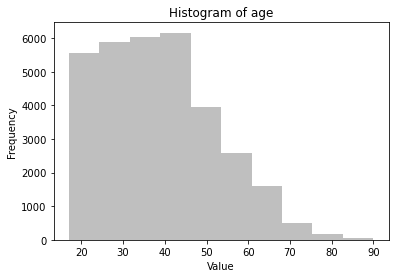

In [32]:
plot_histogram(X['age'])

In [33]:
# Plot histograms to show distribution of features by DV categories
def plot_histogram_dv(x,y):
    plt.hist(list(x[y==0]), alpha=0.5, label='DV=0')
    plt.hist(list(x[y==1]), alpha=0.5, label='DV=1')
    plt.title(f'Histogram of {x.name} by DV Category')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.legend(loc='upper right')
    plt.show()

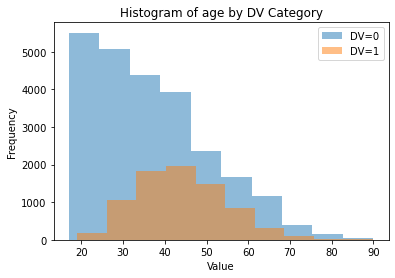

In [34]:
plot_histogram_dv(X['age'], y)

## Part 5: Feature Engineering

### A. Interactions amongst features (Increasing Dimensionality)

- A simple two-way interaction is represented by:
    - X3 = X1 * X2, where X3 is the interaction between X1 and X2
- Can add interaction terms as additional new features to the model; useful for model if the impact of two or more features on the outcome is non-additive
- Example:
    - interaction: education and political ideology; outcome: concerns about climate change
    - while an increase in education amongst liberals or moderates increases concerns about climate change, an increase in education amongst conservatives has the opposite effect
    - the education-political ideology interaction captures more than the two features alone
- Note that the interactions amongst dummy variables belonging to the same categorical feature are always zero
- Although it is very easy to calculate two-way interactions amongst all features, it is very computationally expensive:
    - 10 features => 45 two-way interaction terms
    - 50 features => 1,225 two-way interaction terms
    - 100 features => 4,950 two-way interaction terms
    - 500 features => 124,750 two-way interaction terms
    - Recommend understanding your data and domain if possible and selectively choosing interaction terms

In [35]:
# Use PolynomialFeatures in sklearn.preprocessing to create two-way interactions for all features
from itertools import combinations
from sklearn.preprocessing import PolynomialFeatures

In [36]:
def add_interactions(df):
    # Get feature names
    combos = list(combinations(list(df.columns), 2))
    colnames = list(df.columns) + ['_'.join(x) for x in combos]
    
    # Find interactions
    poly = PolynomialFeatures(interaction_only=True, include_bias=False)
    df = poly.fit_transform(df)
    df = pd.DataFrame(df)
    df.columns = colnames
    
    # Remove interactions terms with all 0 values
    noint_indices = [i for i, x in enumerate(list((df == 0).all())) if x]
    df = df.drop(df.columns[noint_indices], axis=1)
    
    return df

In [37]:
X = add_interactions(X)
X.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,...,race_ Other_native_country_Other,race_ Other_native_country_United-States,race_ White_sex_ Female,race_ White_sex_ Male,race_ White_native_country_Other,race_ White_native_country_United-States,sex_ Female_native_country_Other,sex_ Female_native_country_United-States,sex_ Male_native_country_Other,sex_ Male_native_country_United-States
0,39.0,77516.0,13.0,2174.0,0.0,40.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,50.0,83311.0,13.0,0.0,0.0,13.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
2,38.0,215646.0,9.0,0.0,0.0,40.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
3,53.0,234721.0,7.0,0.0,0.0,40.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,28.0,338409.0,13.0,0.0,0.0,40.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


### B. Dimensionality reduction using PCA

- Principal Component Analysis (PCA) is a technique that transforms a dataset of many features into principal components that "summarize" the variance that underlies the data
- Each principal component is calculated by finding the linear combination of features that maximizes variance, while also ensuring zero correlation with the previously calculated principal components
- Use cases for modeling:
    - One of the most common dimensionality reduction techniques
    - Use if there are too many features or if observation/feature ratio is poor
    - Also, potentially good option if there are a lot of highly correlated variables in your dataset
- Unfortunately, PCA makes models a lot harder to interpret

In [38]:
# Use PCA from sklearn.decomposition to find principal components
from sklearn.decomposition import PCA

In [39]:
pca = PCA(n_components=10)
X_pca = pd.DataFrame(pca.fit_transform(X))
X_pca.head()

,0,1,2,3,4,5,6,7,8,9
0,-3.631343e+07,-1.623399e+07,-6.090999e+06,1.478304e+04,5.906808e+04,-41925.550508,2923.111287,30010.086691,-112172.698287,34338.315783
1,-2.048334e+08,-1.645420e+07,-6.697985e+06,2.217482e+06,3.099297e+05,32056.565790,-141484.816198,43094.713335,-42585.045255,20203.083360
2,-2.048297e+08,-1.638053e+07,1.615325e+06,6.853525e+04,-1.617466e+05,16124.082150,98890.181358,-125219.305502,-62797.663024,166480.647877
3,-2.048282e+08,-1.634992e+07,4.971564e+06,2.694697e+06,-9.003592e+05,13700.805817,-128169.367384,-41359.158352,21439.189113,1228.967387
4,-2.048275e+08,-1.633769e+07,6.408554e+06,-2.375526e+06,1.512329e+06,-49508.725550,-9601.193360,467215.741915,160363.942031,26914.073389


## Part 6: Feature selection and model building

### Build model using processed data

In [40]:
# Use train_test_split in sklearn.cross_validation to split data into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=1)

In [41]:
# The total number of features have grown substantially after dummying and adding interaction terms
X.shape

(32561, 1771)

In [42]:
# Such a large set of features can cause overfitting and also slow computing
# Use feature selection to select the most important features
import sklearn.feature_selection as fs

select = fs.SelectKBest(k=20)
selected_features = select.fit(X_train, y_train)
indices_selected = selected_features.get_support(indices=True)
colnames_selected = [X.columns[i] for i in indices_selected]
colnames_selected

/Users/sp-square/opt/anaconda3/envs/virtual_workspace/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 438  439  535  538  541  714  747  752  754  761  764  890 1126 1127
 1259 1286 1348 1351 1353 1511] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/sp-square/opt/anaconda3/envs/virtual_workspace/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


['education_num',
 'marital_status_ Married-civ-spouse',
 'relationship_ Husband',
 'age_education_num',
 'age_marital_status_ Married-civ-spouse',
 'age_relationship_ Husband',
 'fnlwgt_marital_status_ Married-civ-spouse',
 'fnlwgt_relationship_ Husband',
 'education_num_hours_per_week',
 'education_num_marital_status_ Married-civ-spouse',
 'education_num_relationship_ Husband',
 'hours_per_week_marital_status_ Married-civ-spouse',
 'hours_per_week_relationship_ Husband',
 'marital_status_ Married-civ-spouse_relationship_ Husband',
 'marital_status_ Married-civ-spouse_race_ White',
 'marital_status_ Married-civ-spouse_sex_ Male',
 'marital_status_ Married-civ-spouse_native_country_United-States',
 'relationship_ Husband_race_ White',
 'relationship_ Husband_sex_ Male',
 'relationship_ Husband_native_country_United-States']

In [43]:
X_train_selected = X_train[colnames_selected]
X_test_selected = X_test[colnames_selected]

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

In [45]:
def find_model_perf(X_train, y_train, X_test, y_test):
    model = LogisticRegression()
    model.fit(X_train, y_train)
    y_hat = [x[1] for x in model.predict_proba(X_test)]
    auc = roc_auc_score(y_test, y_hat)
    
    return auc

In [46]:
auc_processed = find_model_perf(X_train_selected, y_train, X_test_selected, y_test)
auc_processed

0.6354440727133813

### Build model using unprocessed data

In [47]:
# Drop missing values so model does not throw any error
df_unprocessed = df
df_unprocessed = df_unprocessed.dropna(axis=0, how='any')
print(df.shape)
print(df_unprocessed.shape)

(32561, 15)
(30162, 15)


In [48]:
# remove non-numeric columns so model does not throw an error
for col_name in df_unprocessed.columns:
    if df_unprocessed[col_name].dtypes not in ['int32', 'int64', 'float32', 'float64']:
        df_unprocessed = df_unprocessed.drop(col_name, 1)

/var/folders/pp/6rmcj3hs5l75h5cs_9gktph00000gn/T/ipykernel_16601/1561930639.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_unprocessed = df_unprocessed.drop(col_name, 1)


In [49]:
# Split into features and outcomes
X_unprocessed = df_unprocessed.drop('income', 1)
y_unprocessed = df_unprocessed.income

/var/folders/pp/6rmcj3hs5l75h5cs_9gktph00000gn/T/ipykernel_16601/3186292285.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X_unprocessed = df_unprocessed.drop('income', 1)


In [50]:
# Take a look again at what the unprocessed feature set looks like
X_unprocessed.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40
3,53,234721,7,0,0,40
4,28,338409,13,0,0,40


In [51]:
# Split unprocessed data into train and test set
# Build model and assess performance
X_train_unprocessed, X_test_unprocessed, y_train, y_test = train_test_split(X_unprocessed, y_unprocessed, train_size=0.7, random_state=1)

auc_unprocessed = find_model_perf(X_train_unprocessed, y_train, X_test_unprocessed, y_test)
auc_unprocessed


0.5760768259842989

In [52]:
# Compare model performance
print(f'AUC of model with data preprocessing: {auc_processed}')
print(f'AUC of model without data preprocessing: {auc_unprocessed}')
per_improve = ((auc_processed-auc_unprocessed) / auc_unprocessed) * 100
print(f'Model improvement of preprocessing: {per_improve}')

AUC of model with data preprocessing: 0.6354440727133813
AUC of model without data preprocessing: 0.5760768259842989
Model improvement of preprocessing: 10.305439144795683
